In [2]:
import os
import sys
from collections import Counter
import json
import cv2
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical

In [3]:

# Location of our dataset
dataset_path = "archive"
print("Contents of the dataset directory:")
print(os.listdir(dataset_path))
print("Contents of the files directory:")
print(os.listdir("files"))


Contents of the dataset directory:
['files', 'labels.csv']
Contents of the files directory:
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg', '10007.jpg', '10008.jpg', '10009.jpg', '1001.jpg', '10010.jpg', '10011.jpg', '10012.jpg', '10013.jpg', '10014.jpg', '10015.jpg', '10016.jpg', '10017.jpg', '10018.jpg', '10019.jpg', '1002.jpg', '10020.jpg', '10021.jpg', '10022.jpg', '10023.jpg', '10024.jpg', '10025.jpg', '10026.jpg', '10027.jpg', '10028.jpg', '10029.jpg', '1003.jpg', '10030.jpg', '10031.jpg', '10032.jpg', '10033.jpg', '10034.jpg', '10035.jpg', '10036.jpg', '10037.jpg', '10038.jpg', '10039.jpg', '1004.jpg', '10040.jpg', '10041.jpg', '10042.jpg', '10043.jpg', '10044.jpg', '10045.jpg', '10046.jpg', '10047.jpg', '10048.jpg', '10049.jpg', '1005.jpg', '10050.jpg', '10051.jpg', '10052.jpg', '10053.jpg', '10054.jpg', '10055.jpg', '10056.jpg', '10057.jpg', '10058.jpg', '10059.jpg', '1006.jpg', '100

In [4]:
files_path = os.path.join(dataset_path, "files")
image_count = len(os.listdir(files_path))

print(f"The total number of images in the dataset is {image_count}.")


The total number of images in the dataset is 18540.


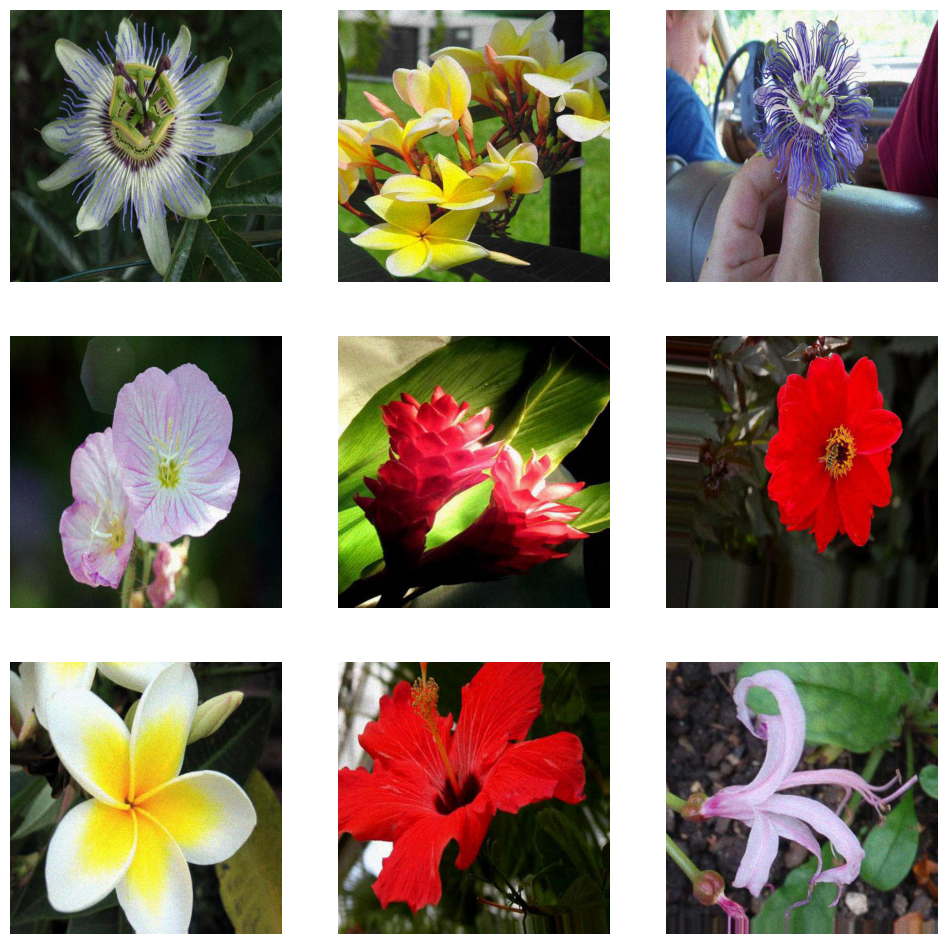

In [5]:
# Display first few images
plt.figure(figsize=(12, 12))
for i in range(9):
    image_name = os.listdir(files_path)[i]
    image_path = os.path.join(files_path, image_name)
    img = Image.open(image_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


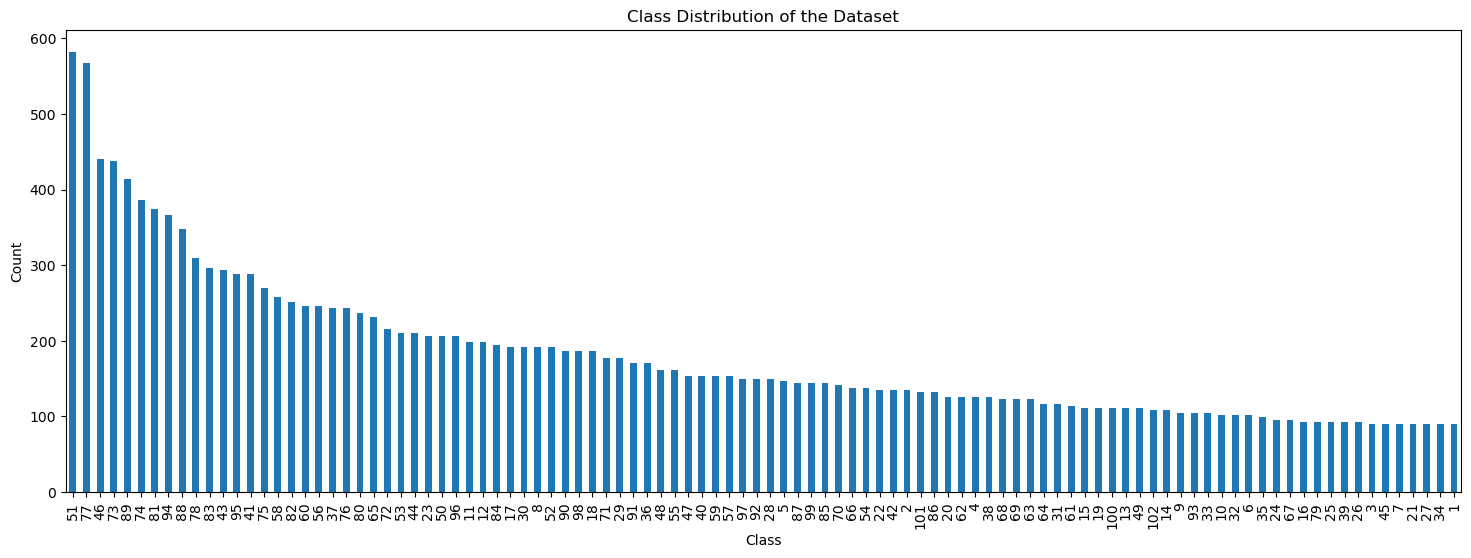

In [6]:

ROOT_PATH = "archive"
df = pd.read_csv(os.path.join(ROOT_PATH, 'labels.csv'))

plt.figure(figsize=(18, 6))
df["category"].value_counts().plot(kind='bar')
plt.title('Class Distribution of the Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [7]:
X = []
y = []
for image, label in tqdm(zip(df.image_id.values, df.category.values), total=len(df)):
    try:
        xt = np.array(Image.open(os.path.join(ROOT_PATH, f"files/{image}.jpg")).resize((128,128)))
        yt = label
        X.append(xt)
        y.append(yt)
    except:
        print(os.path.join(ROOT_PATH, f"files/{image}.jpg"))
    
X = np.array(X)
y = np.array(y)
X.shape, y.shape

  0%|          | 0/18540 [00:00<?, ?it/s]

((18540, 128, 128, 3), (18540,))

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [9]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
train_y.shape, test_y.shape

((14832, 103), (3708, 103))

In [10]:
train_X.shape, train_y.shape

((14832, 128, 128, 3), (14832, 103))

In [11]:
# Define the ImageDataGenerator with various transformations
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# Load an image and transform it using datagen.flow()
img = load_img(os.path.join(ROOT_PATH, f"files/0.jpg"))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Apply transformations and save the results to the 'preview/' directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir="preview", save_prefix='f', save_format='jpg'):
    i += 1
    if i > 20:
        break  # to avoid an infinite loop


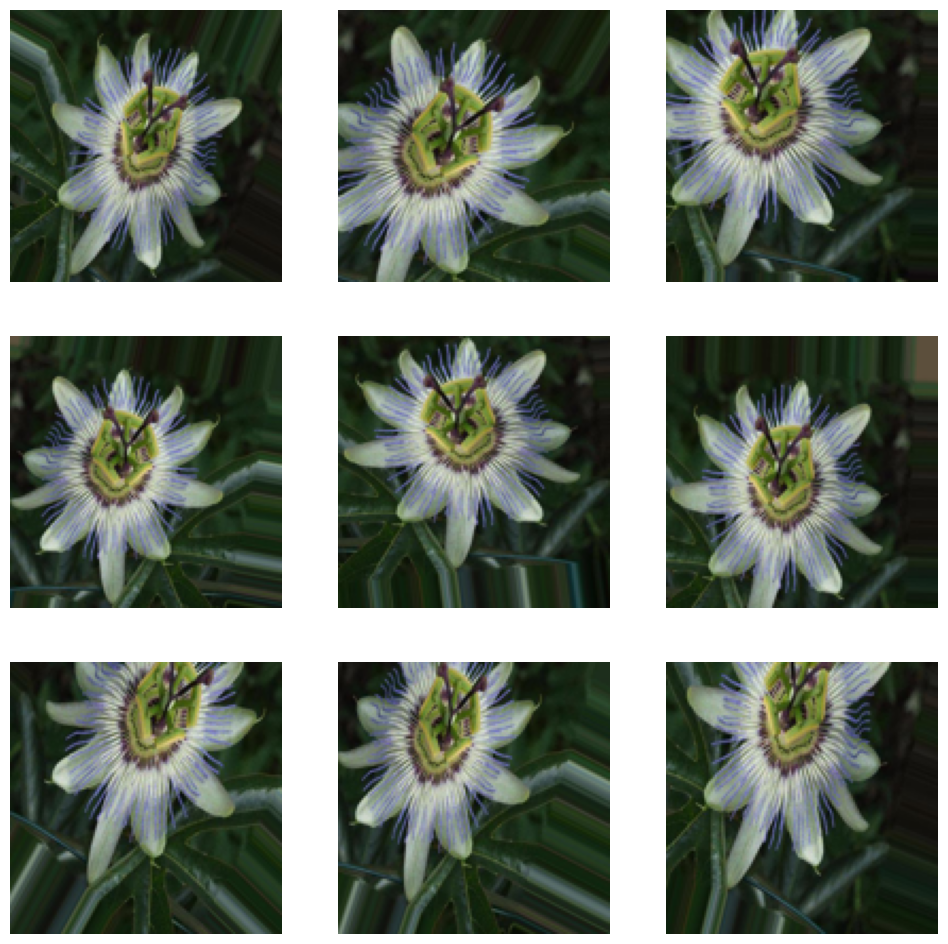

In [12]:
# Initialize an empty list to store transformed images
transformed_images = []

# Iterate over the images in the 'preview' directory and load them
for image in os.listdir('preview'):
    img_path = os.path.join("preview", image)
    transformed_img = np.array(Image.open(img_path).resize((128, 128)))
    transformed_images.append(transformed_img)

# Plot the first few transformed images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(transformed_images[i])
    plt.axis('off')

plt.show()


In [ ]:
# Define the model architecture
model = Sequential()

# Add convolutional layers with ReLU activation and max pooling
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D feature maps to 1D feature vectors
model.add(Flatten())

# Add fully connected layers with dropout for regularization
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation for multi-class classification
model.add(Dense(103))
model.add(Activation('softmax'))

# Compile the model with appropriate loss function, optimizer, and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 61, 61, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                 

In [19]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [20]:
batch_size=16
train_generator = train_datagen.flow(
        train_X,
        train_y,
        batch_size=batch_size,
        shuffle=True)

validation_generator = test_datagen.flow(
        test_X,
        test_y,
        shuffle=False)


In [27]:
hist = model.fit_generator(
        train_generator,
        epochs=50,
        validation_data=validation_generator)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28492\1994053384.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/50
927/927 [==============================] - 410s 439ms/step - loss: 4.2076 - accuracy: 0.0591 - val_loss: 3.6488 - val_accuracy: 0.1211
Epoch 2/50
927/927 [==============================] - 357s 385ms/step - loss: 3.6705 - accuracy: 0.1067 - val_loss: 3.2135 - val_accuracy: 0.2079
Epoch 3/50
927/927 [==============================] - 362s 390ms/step - loss: 3.3969 - accuracy: 0.1456 - val_loss: 2.9883 - val_accuracy: 0.2373
Epoch 4/50
927/927 [==============================] - 444s 479ms/step - loss: 3.2414 - accuracy: 0.1696 - val_loss: 2.8150 - val_accuracy: 0.2837
Epoch 5/50
927/927 [==============================] - 375s 404ms/step - loss: 3.1285 - accuracy: 0.1905 - val_loss: 2.6810 - val_accuracy: 0.3045
Epoch 6/50
927/927 [==============================] - 400s 431ms/step - loss: 3.0224 - accuracy: 0.2061 - val_loss: 2.5169 - val_accuracy: 0.3455
Epoch 7/50
927/927 [==============================] - 346s 373ms/step - loss: 2.9464 - accuracy: 0.2202 - val_loss: 2.4170 -

In [13]:
from keras.applications import VGG16

# Loading the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Adding custom classification layers
model2 = Sequential()
model2.add(base_model)
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(103, activation='softmax'))

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
from keras.applications import ResNet50
from keras.layers import GlobalAveragePooling2D

# Loading the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Adding custom classification layers
model3 = Sequential()
model3.add(base_model)
model3.add(GlobalAveragePooling2D())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(103, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
hist2 = model2.fit_generator(
        train_generator,
        epochs=20,
        validation_data=validation_generator)


In [ ]:
hist3 = model3.fit_generator(
        train_generator,
        epochs=20,
        validation_data=validation_generator)


In [ ]:

import matplotlib.pyplot as plt

# Comparing Training Accuracy
plt.plot(hist.history['accuracy'], label='Model 1 Accuracy', linestyle='--', marker='o')
plt.plot(hist2.history['accuracy'], label='Model 2 Accuracy', linestyle='--', marker='o')
plt.plot(hist3.history['accuracy'], label='Model 3 Accuracy', linestyle='--', marker='o')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Comparing Training Loss
plt.plot(hist.history['loss'], label='Model 1 Loss', linestyle='--', marker='o')
plt.plot(hist2.history['loss'], label='Model 2 Loss', linestyle='--', marker='o')
plt.plot(hist3.history['loss'], label='Model 3 Loss', linestyle='--', marker='o')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Compare Test Accuracy
test_loss, test_acc = model.evaluate(test_X, test_y)
test_loss2, test_acc2 = model2.evaluate(test_X, test_y)
test_loss3, test_acc3 = model3.evaluate(test_X, test_y)

print('Test accuracy for Model 1:', test_acc)
print('Test accuracy for Model 2:', test_acc2)
print('Test accuracy for Model 3:', test_acc3)
